1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [79]:
import numpy as np
import numpy.random as npr
from matplotlib import pyplot as plt
import pandas as pd
from scipy import linalg as la

npr.seed(2029)
N=1000
x1 = npr.normal(0.,1.,N)
x2 = x1 + npr.normal(0.,3.,N)
x3 = 2*x1 + x2

X= np.vstack((x1, x2, x3)) #we want data in rows (x1 in one row, x2 in another row...)
print(X)
cov = np.cov(X)
print('Covariance matrix',cov)

## eigenvalues and eigenvectors of cov
l,V= la.eig(cov)
print("eigenvalues:", l,'\n')
print("eigenvectors:", V,'\n')

##eigenvalues and eigenvectors using SVD
#X_zeromean = X
#X_zeromean[2,:]= X_zeromean[2,:]-X[2,:].mean() ##shift X to zero mean data for feature x2
#print(X_zeromean)
U, spectrum, Vt = la.svd(X)

l_svd = spectrum**2/(N-1)
V_svd = U

print("eigenvalues SVD:", l_svd,'\n')
print("eigenvectors SVD:", V_svd,'\n') 

Lambda= np.diag(l)
print('Lambda', Lambda)
print ("Cov Trace():", cov.trace())
print ("Lambda Trace():", Lambda.trace())

print ("The first variable (principal component) explains ", Lambda[0,0]*100/Lambda.trace(), "% of the total variability of the data")
print("If we get rid of the x2 variable we keep", (Lambda[0,0]+Lambda[2,2])*100/Lambda.trace(),"% of the total variability")
X_reduced = np.vstack((x1,x3)) 
print('X reduced', X_reduced) #we keep only the 2 principal variables

[[-0.41631429 -0.63902114  0.28060295 ...  0.90126416  0.36989293
  -1.7446321 ]
 [-2.5956232   3.74501911 -5.60941073 ... -3.57470759 -2.62423203
  -5.46406476]
 [-3.42825178  2.46697682 -5.04820483 ... -1.77217927 -1.88444618
  -8.95332895]]
Covariance matrix [[ 1.03494738  1.03185334  3.1017481 ]
 [ 1.03185334 10.22383422 12.28754089]
 [ 3.1017481  12.28754089 18.49103708]]
eigenvalues: [ 2.76875778e+01+0.j -8.00322322e-16+0.j  2.06224088e+00+0.j] 

eigenvectors: [[-0.11645649 -0.81649658  0.56548317]
 [-0.57611612 -0.40824829 -0.70811266]
 [-0.80902911  0.40824829  0.42285368]] 

eigenvalues SVD: [2.77777014e+01 2.06588192e+00 2.53106455e-30] 

eigenvectors SVD: [[-0.11605739  0.56556522 -0.81649658]
 [-0.57661571 -0.70770591 -0.40824829]
 [-0.80873049  0.42342452  0.40824829]] 

Lambda [[ 2.76875778e+01+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j -8.00322322e-16+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  2.06224088e+00+0.j]]
Cov Trac

Data rotated on eigenvector V basis [[ 4.31741836e+00 -4.07900379e+00  7.28313859e+00 ...  3.38823323e+00
   2.99335777e+00  1.05946133e+01]
 [-6.94916049e-16  1.89615015e-15 -2.33000161e-15 ... -1.95438866e-15
  -1.23512758e-15 -1.02639290e-15]
 [ 1.52926051e-01 -1.97008093e+00  1.99611902e+00 ...  2.29157290e+00
   1.27057516e+00 -9.03334752e-01]]


(-20.0, 20.0)

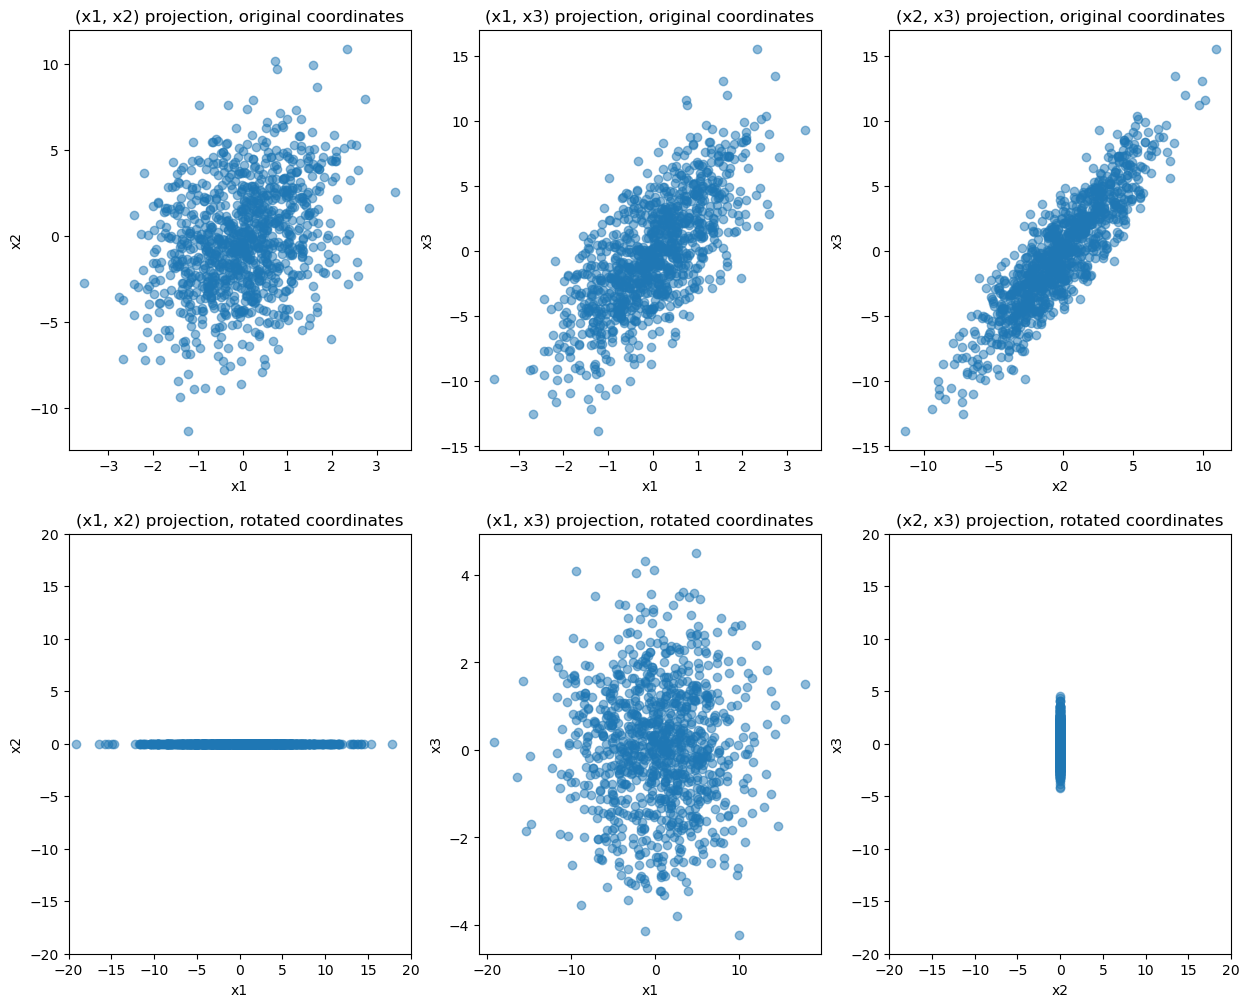

In [85]:

Xp = np.dot(V.T, X) # X rotated with eigenvectors V as new basis
print('Data rotated on eigenvector V basis', Xp)
#Graphs 
fig, axes = plt.subplots(2, 3, figsize=(15, 12)) #2 rows, 3 columns of graphs

axes[0, 0].scatter(X[0,:], X[1,:], alpha=0.5)
axes[0, 0].set_xlabel("x1")
axes[0, 0].set_ylabel("x2")
axes[0, 0].set_title("(x1, x2) projection, original coordinates")

axes[0, 1].scatter(X[0,:], X[2,:], alpha=0.5)
axes[0, 1].set_xlabel("x1")
axes[0, 1].set_ylabel("x3")
axes[0, 1].set_title("(x1, x3) projection, original coordinates")

axes[0, 2].scatter(X[1,:], X[2,:], alpha=0.5)
axes[0, 2].set_xlabel("x2")
axes[0, 2].set_ylabel("x3")
axes[0, 2].set_title("(x2, x3) projection, original coordinates")

axes[1, 0].scatter(Xp[0,:], Xp[1,:], alpha=0.5)
axes[1, 0].set_xlabel("x1")
axes[1, 0].set_ylabel("x2")
axes[1, 0].set_title("(x1, x2) projection, rotated coordinates")
axes[1, 0].set_xlim(-20, 20)
axes[1, 0].set_ylim(-20, 20)

axes[1, 1].scatter(Xp[0,:], Xp[2,:], alpha=0.5)
axes[1, 1].set_xlabel("x1")
axes[1, 1].set_ylabel("x3")
axes[1, 1].set_title("(x1, x3) projection, rotated coordinates")

axes[1, 2].scatter(Xp[1,:], Xp[2,:], alpha=0.5)
axes[1, 2].set_xlabel("x2")
axes[1, 2].set_ylabel("x3")
axes[1, 2].set_title("(x2, x3) projection, rotated coordinates")
axes[1, 2].set_xlim(-20, 20)
axes[1, 2].set_ylim(-20, 20)


2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [96]:
# get the dataset and its description on the proper data directory
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data 
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names 

--2024-12-24 18:03:38--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving proxy.server (proxy.server)... 10.0.0.51
Connecting to proxy.server (proxy.server)|10.0.0.51|:3128... connected.
Proxy tunneling failed: ForbiddenUnable to establish SSL connection.
--2024-12-24 18:03:38--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Resolving proxy.server (proxy.server)... 10.0.0.51
Connecting to proxy.server (proxy.server)|10.0.0.51|:3128... connected.
Proxy tunneling failed: ForbiddenUnable to establish SSL connection.


In [183]:
import pandas as pd
file_name = "magic_data.dat"
data = pd.read_csv(file_name) 
df= pd.DataFrame(data.values, columns=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class'])
print('\n')
print(df)
df_no_class = df.drop(columns=['class'])
cov = df_no_class.cov()
print('Covariance Matrix \n',cov,'\n')

l,V= la.eig(cov)
print("Eigenvalues:", l,'\n')
print("Eigenvectors:", V,'\n')




        fLength   fWidth   fSize   fConc  fConc1     fAsym   fM3Long fM3Trans  \
0       31.6036  11.7235  2.5185  0.5303  0.3773   26.2722   23.8238  -9.9574   
1       162.052  136.031  4.0612  0.0374  0.0187   116.741   -64.858  -45.216   
2       23.8172   9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633  -7.1513   
3       75.1362  30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525  21.8393   
4        51.624  21.1502  2.9085   0.242   0.134   50.8761   43.1887   9.8145   
...         ...      ...     ...     ...     ...       ...       ...      ...   
19014   21.3846   10.917  2.6161  0.5857  0.3934   15.2618   11.5245   2.8766   
19015   28.9452    6.702  2.2672  0.5351  0.2784   37.0816   13.1853  -2.9632   
19016   75.4455  47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562  -9.4662   
19017  120.5135  76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224 -63.8389   
19018  187.1814  53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558  31.4755   

        fAlpha     fDist 

In [245]:
Lambda= np.diag(l)
cov=np.array(cov)
print ("Cov Trace():", cov.trace())
print ("Lambda Trace():", Lambda.trace())

print("If we get rid of the 3 least significant variables we keep", (cov.trace()-Lambda[-3,-3]-Lambda[-2,-2]-Lambda[-1,-1])*100/Lambda.trace(),"% of the total variability of the dataset")

Xp = np.dot(df_no_class, V[:,:-3])

# Create a new dataframe for the PCA-transformed data
sorted_indices = np.argsort(l)[::-1]
retained_features = df_no_class.columns[sorted_indices[:-3]]
df_PCA = pd.DataFrame(Xp,columns=retained_features)
df_PCA

Cov Trace(): 14938.039097757799
Lambda Trace(): (14938.039097757795+0j)
If we get rid of the 3 least significant variables we keep (99.99934715074534+0j) % of the total variability of the dataset


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long
0,174.584036,-109.897345,33.990587,7.504008,27.851736,-11.0688,0.791249
1,243.43757,-111.288711,162.330205,-158.003704,84.033056,-48.767946,-64.163811
2,97.931136,-58.006821,42.246046,-4.308835,20.07411,-8.226268,0.864502
3,331.894267,-145.569115,40.85041,7.847066,39.157183,20.134795,-1.603098
4,199.670989,-148.390822,37.02901,-13.543814,29.24498,8.412757,-0.678821
...,...,...,...,...,...,...,...
19014,92.562908,-56.979854,19.079346,-2.308232,13.245148,2.295842,-2.197234
19015,201.471977,-119.756685,61.305786,11.546575,110.709798,-5.523768,9.894246
19016,247.776336,-105.163329,10.012074,-23.130549,55.003321,-10.609539,-17.688442
19017,396.067821,-87.98214,157.624558,-34.206467,106.823914,-67.839049,-23.583873
